In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve


In [2]:
# Load the IMDb movie review dataset
movie_reviews = load_files('/Users/ravan/Downloads/Dataset/test', categories=['neg', 'pos'], encoding='utf-8')
X, y = movie_reviews.data, movie_reviews.target
print("Number of documents:", len(X))



Number of documents: 25000


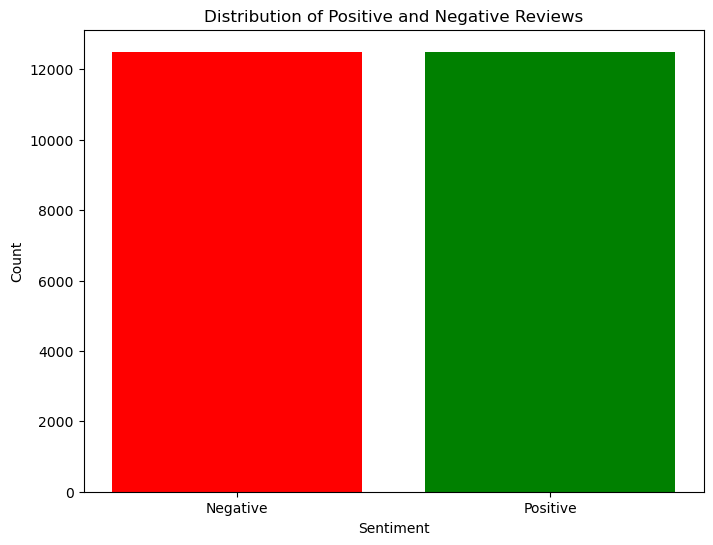

In [3]:
# Step 1: Data Visualization
# Visualize the distribution of positive and negative reviews
count_positive = np.sum(y)
count_negative = len(y) - count_positive

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [count_negative, count_positive], color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative Reviews')
plt.show()



In [4]:
# Text Preprocessing
# (You can add further visualizations for review length and other features, if desired)

# Step 2: Feature Engineering and Model Training
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()



In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



In [6]:
# Step 3: Model Training and Evaluation
# Train a Linear Support Vector Classifier (SVC) model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)



LinearSVC()

In [7]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)



In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8672


In [9]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2482
           1       0.87      0.86      0.87      2518

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [10]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[2159  323]
 [ 341 2177]]


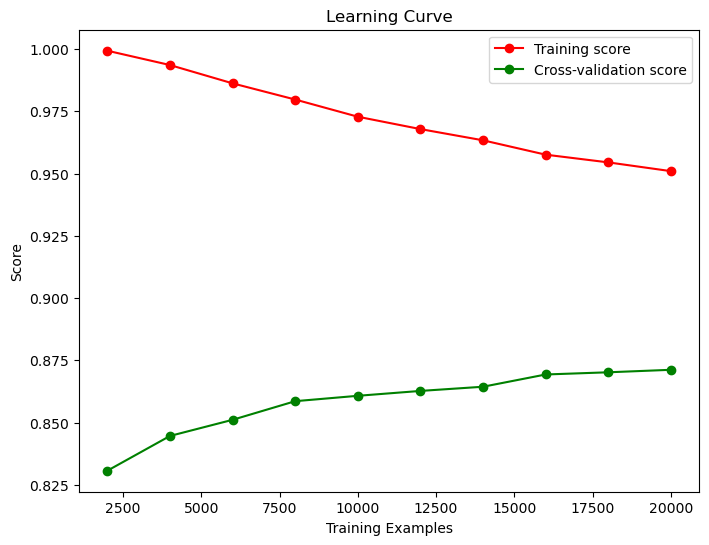

In [11]:

# Learning Curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_tfidf, y, cv=5, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()



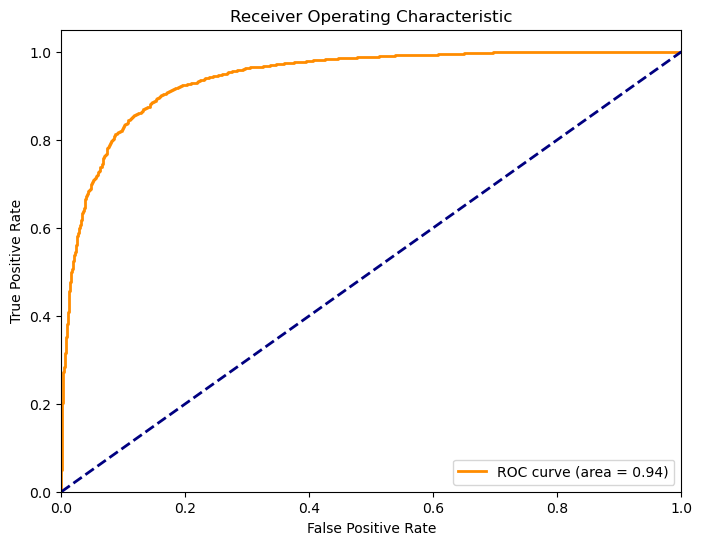

In [12]:
# ROC Curve
y_scores = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



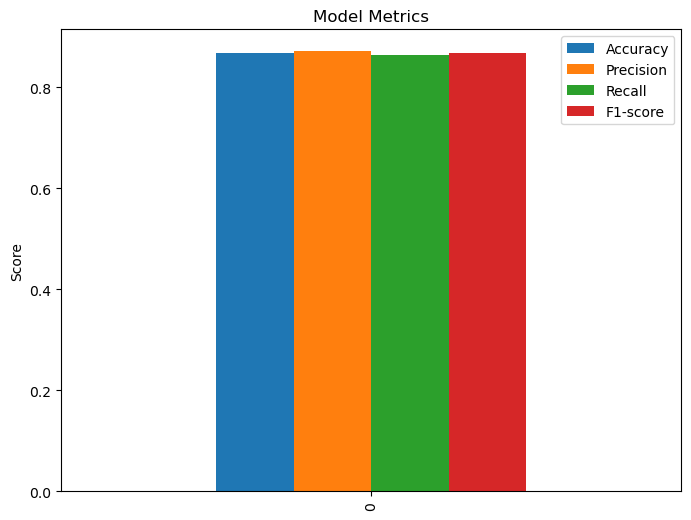

In [13]:
# Bar chart for model metrics
metrics = classification_report(y_test, y_pred, output_dict=True)
accuracy = metrics['accuracy']
precision = metrics['1']['precision']
recall = metrics['1']['recall']
f1 = metrics['1']['f1-score']

metrics_df = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1-score': [f1]})
metrics_df.plot(kind='bar', figsize=(8, 6))
plt.title('Model Metrics')
plt.ylabel('Score')
plt.show()


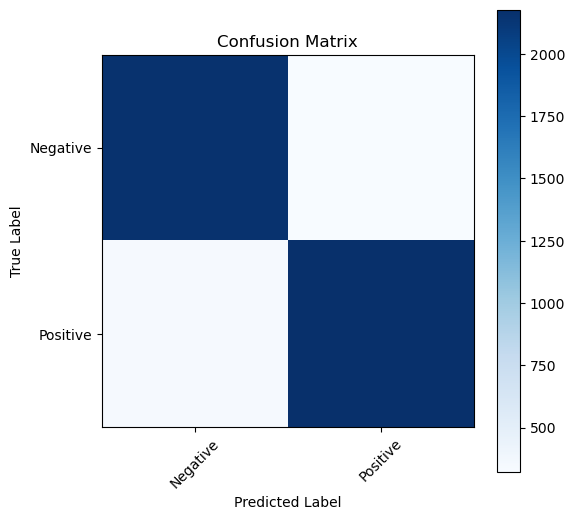

In [14]:
labels = ['Negative', 'Positive']
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(2), labels, rotation=45)
plt.yticks(np.arange(2), labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
